<hr>

# Portrait of a lake's death

<i>by [Colas Droin](colasdroin.github.io) (EPFL), [Diana Zambellini](https://www.linkedin.com/in/diana-zambelloni-0b346b155/en/?originalSubdomain=it) (EPFL), and [Carlos Vivar Rios](h4ck1ng.science) (h4cking.science).</i>

Project developed for the Jupyter Notebook Competition by [Wekeo](https://notebook.wekeo.eu/). MIT License 2022.
<hr>


## Abstract

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

<hr>

## Notebook outline

* [1 - Introduction](#introduction)
* [2 - Analysis](#Analysis)
    * [2.1 - Products selection and downloading](#products_selection)
    * [2.2 - Products preprocessing](#products_preprocessing)
    * [2.3 - Lake segmentation](#lake_segmentation)
    * [2.4 - Lake dynamics](#lake_dynamics)
* [3 - Conclusions](#conclusions)



<hr>

## <a id='introduction'></a>1. Introduction

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

<hr>

## <a id='analysis'></a> 2. Analysis

The first step is to inspect a Sentinel-2 image file, in order to better understand the file structure. Sentinel-2 carries a single `Multi-spectral Instrument (MSI)`, which provides 13 bands in the `visible`, `near-infrared` and `shortwave-infrared` spectrum with different ground resolutions:

|#|Name|Spatial Resolution|
|------------|----------------|-----------------|
|B1|Coastal aerosol|60|
|B2|Blue|10|
|B3|Green|10|
|B4|Red|10|
|B5|Red Edge 1|20|
|B6|Red Edge 2|20|
|B7|Red Edge 3|20|
|B8|Near-Infrared|10|
|B8a|Near-Infrared narrow|20|
|B9|Water vapor|60|
|B10|Shortwave-Infrared cirrus|60|
|B11|Shortwave Infrared 1|20|
|B12|Shortwave-Infrared 2|20|

<hr>

## Dependencies installation

In [ ]:
# !pip install matplotlib
# !pip install ipywidgets
# !pip install umap-learn
# !pip install opencv-python
# !pip install imutils
# !pip install seaborn
# !pip install calmap

<hr>

### Products selection and downloading

Footprint selection using [Openstreetmaps WTK playground](https://clydedacruz.github.io/openstreetmap-wkt-playground/)

![](assets/wtk_prev.png)

```
POLYGON((-70.9649357878204 -33.81244707234685,-70.96591676385808 -33.89260670554516,-70.84251675089554 -33.89488656955273,-70.84506715448308 -33.81375110356652,-70.9649357878204 -33.81244707234685))
```

Selection of a time range starting on 2016 until 2022.


Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [ ]:
#%run "./technical_notebooks/000_data_downloading.ipynb"

In [ ]:
%%time
# Alternative you can download the dataset from OSF. Each zip files requires aproximately 1GB. 
import requests
import numpy as np
import zipfile
import os

ixs = ['vek4x', 'hq2v6', 'zt9m3', 'qc35s', 'pa57c', 'gqxeu', 'cq4wr']
for year, ix in zip(np.arange(2016,2023), ixs):
    r = requests.get("https://osf.io/download/{}".format(ix))
    with open('data/{}.zip'.format(year), "wb") as fid:
        fid.write(r.content)

for year in np.arange(2016,2023):
    filepath = 'data/{}.zip'.format(year)
    with zipfile.ZipFile(filepath,"r") as zip_ref:
        zip_ref.extractall("data")
        
    os.remove(filepath)

In [ ]:
## View dataproducts using folium?

<hr>

### Products preprocessing

In [6]:
%%time
%run "./technical_notebooks/001_data_preprocessing.ipynb" # 5 min

CPU times: user 1min 34s, sys: 1min 18s, total: 2min 53s
Wall time: 5min 34s


In this table we can see all the metadata obtained from the downloaded products.

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [7]:
display_table_summary()

,datatakesensingstart,beginposition,endposition,ingestiondate,processinglevel,platformname,size,year
411c4c16-ed88-42af-a8e2-9a1414af3a62,2016-01-05 14:37:32.029,2016-01-05 14:37:32.029,2016-01-05 14:37:32.029,2018-12-18 19:07:14.311,Level-1C,Sentinel-2,635.49 MB,2016
4baae820-6e86-4301-9c4c-590311459b04,2016-01-22 14:29:42.030,2016-01-22 14:29:42.030,2016-01-22 14:29:42.030,2018-12-14 16:58:06.033,Level-1C,Sentinel-2,378.96 MB,2016
9aa597a5-e1cc-45af-97df-655f12eeabe5,2016-02-04 14:37:22.029,2016-02-04 14:37:22.029,2016-02-04 14:37:22.029,2018-12-07 19:45:55.926,Level-1C,Sentinel-2,811.35 MB,2016
4e3062c2-018c-49a5-8037-b7b9b9eaf407,2016-02-11 14:42:12.029,2016-02-11 14:42:12.029,2016-02-11 14:42:12.029,2018-12-08 12:46:18.299,Level-1C,Sentinel-2,301.32 MB,2016
feeab6d4-6768-4da7-a0e2-d9ca3d856c20,2016-03-02 14:42:02.030,2016-03-02 14:42:02.030,2016-03-02 14:42:02.030,2018-12-06 04:22:04.990,Level-1C,Sentinel-2,288.34 MB,2016
...,...,...,...,...,...,...,...,...
4093f883-6257-4827-9b8e-64d6a13d58e1,2022-05-23 14:37:31.024,2022-05-23 14:37:31.024,2022-05-23 14:37:31.024,2022-05-23 22:24:32.282,Level-1C,Sentinel-2,645.87 MB,2022
884fff44-99f2-4bd5-a571-6fe53ccb3d15,2022-05-28 14:37:29.024,2022-05-28 14:37:29.024,2022-05-28 14:37:29.024,2022-05-28 19:54:16.107,Level-1C,Sentinel-2,633.39 MB,2022
b31187b3-349f-4988-96ed-305692e738a8,2022-06-02 14:37:41.024,2022-06-02 14:37:41.024,2022-06-02 14:37:41.024,2022-06-02 23:14:05.200,Level-1C,Sentinel-2,799.76 MB,2022
9cb65394-097c-40c0-bee0-1eb2849acb67,2022-06-07 14:37:29.024,2022-06-07 14:37:29.024,2022-06-07 14:37:29.024,2022-06-07 19:38:38.627,Level-1C,Sentinel-2,739.14 MB,2022


We can see the temporal distribution.

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

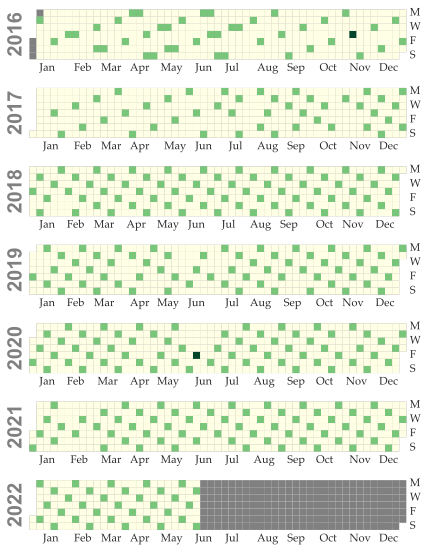

In [8]:
calendar_all_products()

Using `ipywidgets` we can visualize all the products overlapping. Pay attention many of then are covered by clouds. 

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [9]:
visualize_all_products()

Output()

Via the distribution of the average image value we can obtain hoomogeneous images.

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

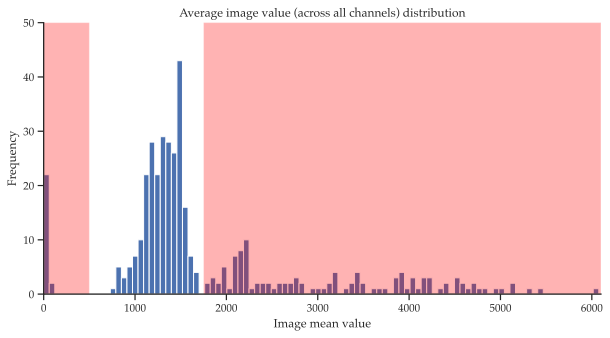

In [10]:
plot_average_image_value()

We discard images that are far away from the central distribution. 

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

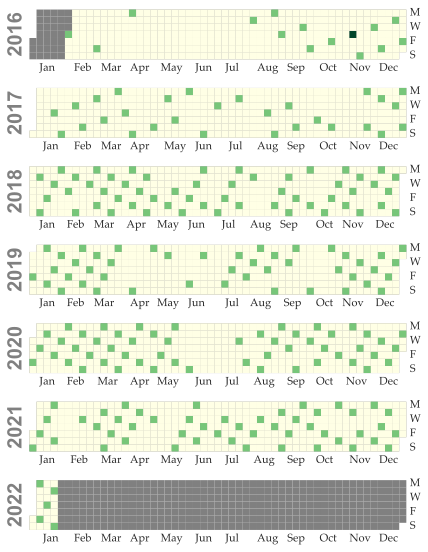

In [11]:
calendar_selected_products()

Here we can visualize the final set of selected images.

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [12]:
visualize_selected_products()

Output()

<hr>

### Lake segmentation

In [19]:
%run "./technical_notebooks/002_data_segmentation.ipynb"

In order to segment the lake we ....... COMPLETE


Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

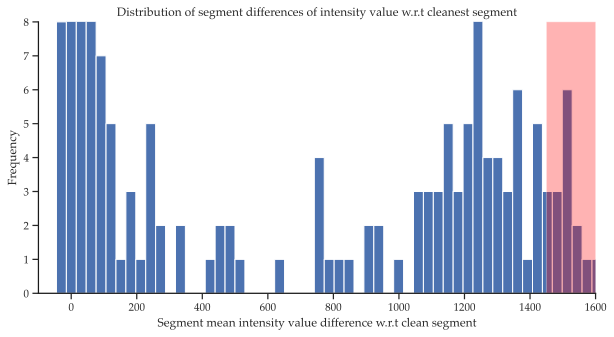

In [20]:
plot_segment_differences()

The final result can be visualized,

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

In [21]:
visualize_segmentation()

Output()

<hr>

### Lake Dynamics

In [24]:
%run "./technical_notebooks/003_time_series_analysis.ipynb"

By calculating the total area of the lake we can study its evolution over time. 

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

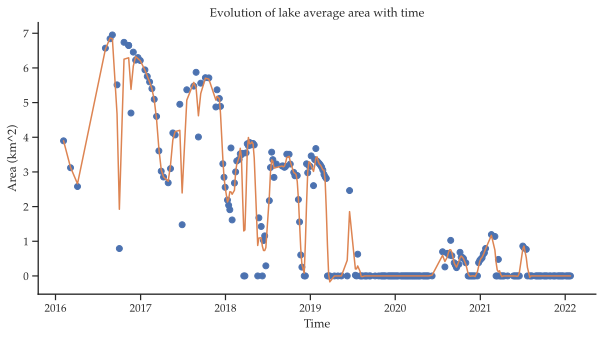

In [25]:
plot_evolution_lake_average()

Relative error, refinement?

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

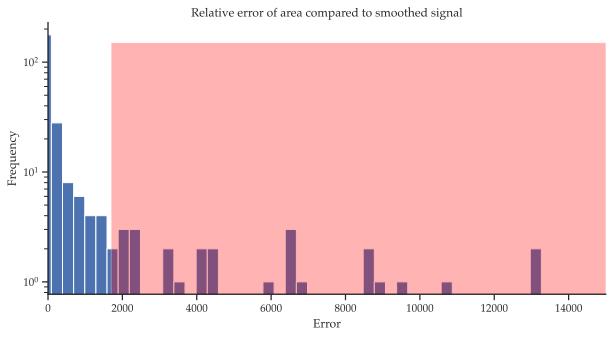

In [26]:
plot_relative_error_area()

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

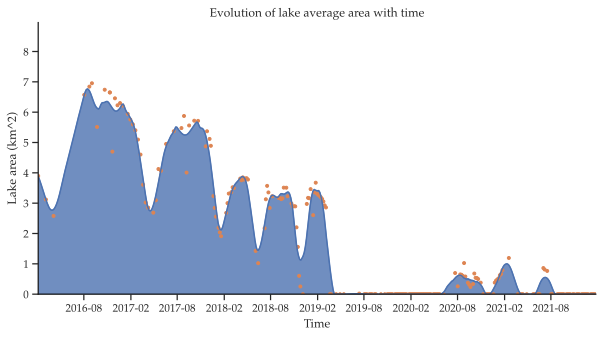

In [27]:
plot_evolution_lake_average_time()

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

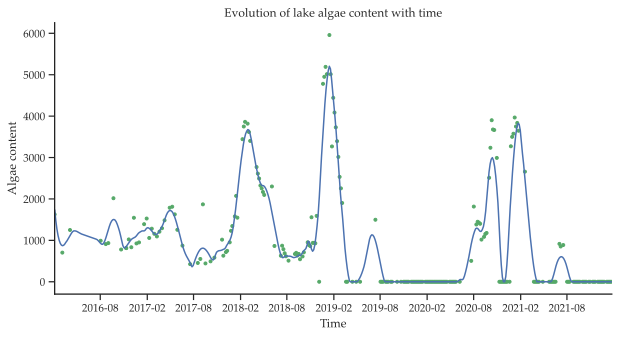

In [28]:
plot_evolution_lake_algae()

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

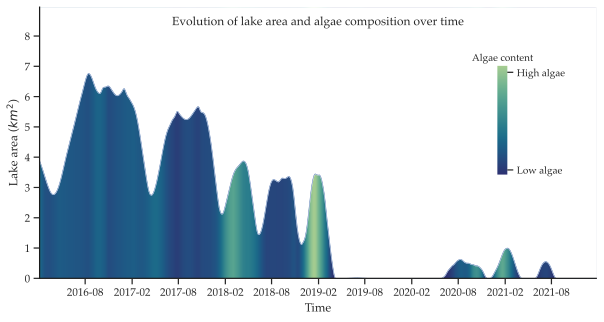

In [29]:
plot_evolution_area_algae()

<hr>

## Conclusion

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.

<hr>

<i><b>Portrait of a lake's death</b> by [Colas Droin](colasdroin.github.io) (EPFL), [Diana Zambellini](https://www.linkedin.com/in/diana-zambelloni-0b346b155/en/?originalSubdomain=it) (EPFL), and [Carlos Vivar Rios](h4ck1ng.science) (h4cking.science).</i>

Project developed for the Jupyter Notebook Competition by [Wekeo](https://notebook.wekeo.eu/). MIT License 2022.
